# Lab 1 - ELE - 33
## Alunos: Ana Paula Lopes Schuch
## Artur Assis Alves

In [ ]:
#Run this cell to get the tools.py file:
!rm -f tools.py                                        #Remove tools.py ignoring if tools.py does not exist.
!git clone 'https://github.com/ArturAssisComp/Hamming-Code-Simulation.git'
!mv Hamming-Code-Simulation/tools/tools.py "/content/tools"  #Move tools.py to /content
!mkdir plots
!rm -rf Hamming-Code-Simulation/                       #Delete directory Hamming-Code-Simulation.

In [4]:
#Run 'Git Commands' before importing tools.
import sys
sys.path.append(".")
from tools import tools as tl
#import tools as tl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time

Initiate process:
p = 0.5        (T:89.37 s)
p = 0.31802    (T:84.36 s)
p = 0.202273   (T:82.45 s)
p = 0.128653   (T:86.97 s)
p = 0.0818286  (T:82.61 s)
p = 0.0520462  (T:82.06 s)
p = 0.0331034  (T:85.44 s)
p = 0.0210551  (T:92.14 s)
p = 0.0133918  (T:84.77 s)
p = 0.00851774 (T:88.25 s)
p = 0.00541761 (T:91.61 s)
p = 0.00344581 (T:86.4  s)
p = 0.00219167 (T:92.06 s)
p = 0.00139399 (T:89.69 s)
p = 0.000886631 (T:84.76 s)
p = 0.000563932 (T:86.2  s)
p = 0.000358683 (T:82.62 s)
p = 0.000228136 (T:91.78 s)
p = 0.000145104 (T:83.12 s)
p = 9.22916e-05 (T:86.13 s)
p = 5.8701e-05 (T:94.05 s)
p = 3.73362e-05 (T:82.16 s)
p = 2.37473e-05 (T:88.22 s)
p = 1.51042e-05 (T:90.57 s)
p = 9.60685e-06 (T:94.32 s)
p = 6.11033e-06 (T:88.09 s)
p = 3.88641e-06 (T:81.2  s)
p = 2.47191e-06 (T:84.27 s)
p = 1.57223e-06 (T:80.67 s)
p = 1e-06      (T:82.07 s)
Completed in 2.598e+03s


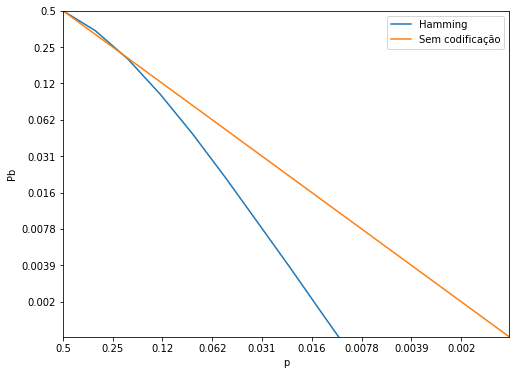

In [8]:
pb = []
p_vector = []
number_information_words = 1000000
inf_limit = 1e-6
vp = np.logspace(math.log(0.5, 2), math.log(inf_limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
for p in vp:
    ini_cycle = time.time()
    p_vector.append(p)
    information_words, code_words = tl.generate_information_and_codewords(number_information_words)
    received_words = tl.binary_symmetric_channel(code_words, p)
    decoder_words = tl.decoder(received_words)
    pb.append(tl.comparator(information_words, decoder_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(p_vector, pb, label='Hamming')
plt.plot(x, x, label='Sem codificação')
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./plots/fig_sz_{}_lim_{}.png'.format(number_information_words, inf_limit))
plt.show()